# Time Series

## Timestamps

`pandas` represents an instant in time using the `pandas.Timestamp` class:

In [1]:
import pandas as pd 

# Create a timestamp
pd.Timestamp(year=2025,
            month = 10, 
            day = 16,
            hour = 9,
            minute = 56, 
            second = 40)

Timestamp('2025-10-16 09:56:40')

In [2]:
# Notice the data type of the column is datetime64
pd.Series([pd.Timestamp(2020,10,18), 
           pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-18
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

# Data Exploration


In [3]:
# Read in data 
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

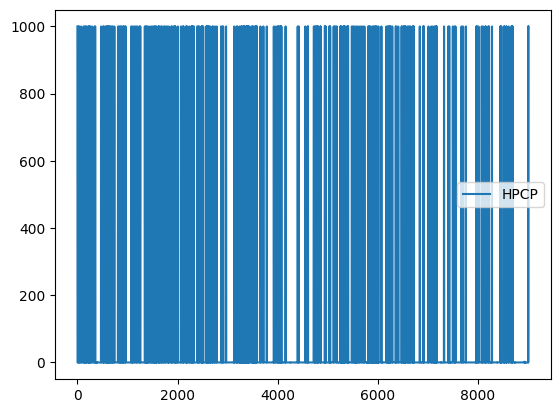

In [4]:
# Plot hourly precipitation in Boulder CO 
precip.plot()

There are a few things going on with this graph:

Outliers: There are many jumps close to 1000. This is clearly not right and these are outliers. Looking at the column descriptions we can see 999.99 indicates the hourly precipitation data is missing.

Indexing: The 
-axis values are given by the index of the dataframe and not relative to time.

Time range: We are only intersted in the precipitation data from 2013, this graph is trying to plot all our data.

Let’s fix each one of these issues separately.



# Reading in missing data values

The metadata states the missing values are indicated by the number 999.99. We can use this information to reload the dataframe indicating 999.99 is the missing value. To do this, we add the `na_values` parameter to the `pandas.read_csv()` function to indicitate additional values that should be recognized as `NA`:

In [5]:
# Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

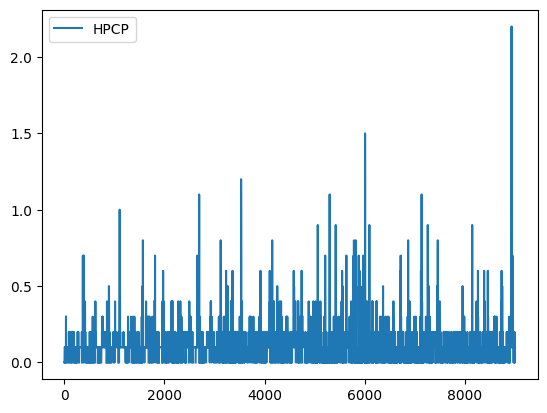

In [6]:
precip.plot()

This looks better and we can already see there is something going on close to the end of the time series.

## Casting strings into dates

Notice `Date` column in our dataframe is not of type `datetime`:

In [7]:
# Check whether DATE column is of type datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

Remember that the object `dtype` means that (most likely) all values in that column are strings. We can easily convert strings to datetime objects using the `pandas.to_datetime()` function:

`pandas.to_datetime()` input: a `pandas.Series` with strings that can be converted to dates
`pandas.to_datetime()` output: a `pandas.Series` with the strings converted to datetime objects
#### Example

In [8]:
# Convert DATE column to timestamps
pd.to_datetime(precip.DATE)

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [9]:
# Convert DATE column to timestamps
precip.DATE = pd.to_datetime(precip.DATE)

# Check DATE column data type is updated
print(precip.dtypes)

# Check new values
precip.DATE.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object


0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-02 20:00:00
3   2000-01-03 01:00:00
4   2000-01-03 05:00:00
Name: DATE, dtype: datetime64[ns]

<AxesSubplot:xlabel='DATE'>

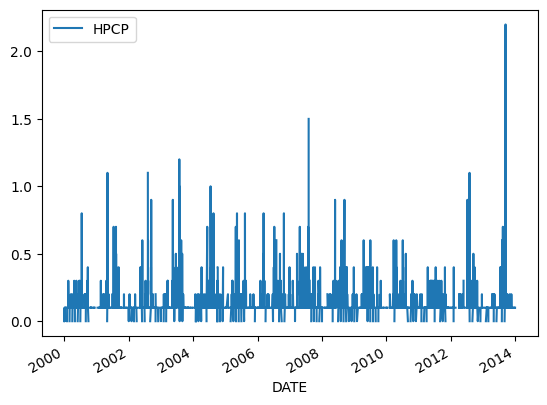

In [10]:
precip.plot(x='DATE', y='HPCP')

Notice the 
-axis is now neatly organized into years.

Next, using our DATE column as the index will allows to perform operations with respect to time, including subsetting and resampling.

In [11]:
# Set DATE column as index
precip=precip.set_index('DATE')

# Inspect new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<AxesSubplot:xlabel='DATE'>

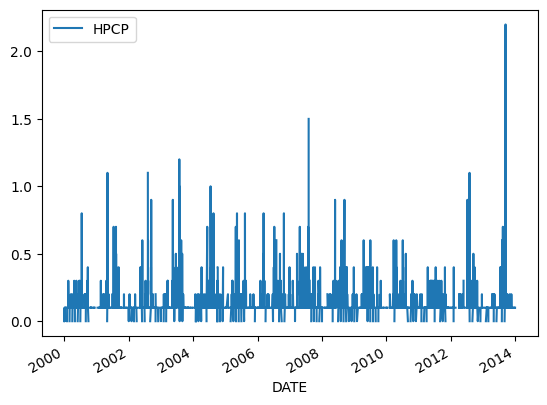

In [12]:
precip.plot()

## Read in dataset in specific format to avoid some wrangling

In [15]:
precip = pd.read_csv(URL,
                    na_values=[999.99],
                    index_col=['DATE'],
                    parse_dates=['DATE'])

precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Subsetting by date

We can use `.loc[year-month]` to select data from specific year and month

In [16]:
# Select precipitation data from Septempber 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [17]:
# Select 2013 precipitation data
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

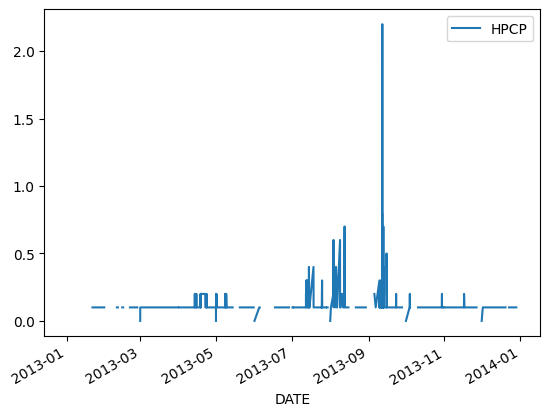

In [20]:
precip.loc['2013'].plot()

## Resample

Resampling a time series means covering a time series from one frequency to another. For example, montly to yearly (downsampling) or weekly to daily (upsampling).

We can resample with the `resample()` method. The simplest use is to call 

```
df.resample(new_frequenct).aggregator_function()
```
where:

new_frequency is a string representing the new frequence to resample the data, for example 'D' for day, w for week, M for month, Y for year, and
`aggregator_function()` is the function we will use to aggregate the data into the new frequency. For example, `max()`, `min()`, `sum()`, or `average()`.

The `resample()` method works similarly to `groupby()` in the sense that you need to specify a way to aggregate the data to get any output.


#### Example
Our 2013 precipitation data has hourly frequency, we want to resample it to daily frequency.




In [21]:
# Resample 2013 hourly data to daily frequency: no output
precip.loc['2013'].resample('D')

To get an output we need to add an aggregator function that indicates how we want to summarize the data that falls on each day. In this case we want the total precipitation on a day, so we will aggreagate it using `sum()`:

In [23]:
# Total daily precipitation in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

daily_precip_2013.head(3)

,HPCP
DATE,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0


<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

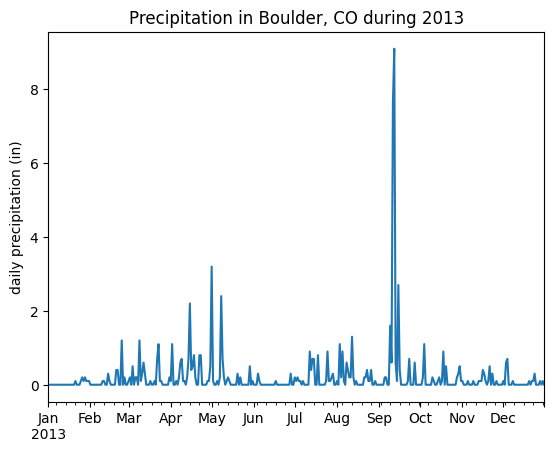

In [24]:
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)

# Complete workflow

The previous code includes a lot of exploratory functions and trials. While it is important to keep our data exploration documented, once we are certain of our data wrangling, we can streamline our analyses to only include the code that directly contributes to the output. Moving on, we will start to collect all our relevant code to create such complete workflows. For this lesson, the code below will produce the final graph:



<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

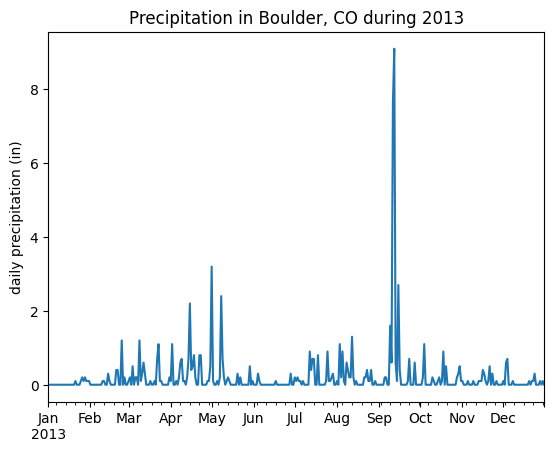

In [25]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)